In [40]:
# Importing Dependencies
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import numpy as np

In [41]:
# Checking whether GPU is activsted for tensorflow 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [42]:
#image array of first image
image_array=cv2.imread('C:/Users/Asus/Downloads/prepared_data/Train/Closed_eyes/s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)

In [43]:
image_array.shape

(86, 86)

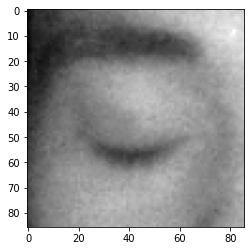

In [44]:
plt.imshow(image_array,cmap='gray')

In [45]:
Main_dir ="C:/Users/Asus/Downloads/prepared_data/"

train_dir =os.path.join(Main_dir,'Train')
test_dir =os.path.join(Main_dir,'Test')

train_closed_dir =os.path.join(train_dir,'Closed_eyes')
train_open_dir =os.path.join(train_dir,'Open_eyes')

test_closed_dir =os.path.join(test_dir,'Closed_eyes')
test_open_dir =os.path.join(test_dir,'Open_eyes')

In [46]:
train_closed_names =os.listdir(train_closed_dir)
print(train_closed_names[:5])

train_open_names =os.listdir(train_open_dir)
print(train_open_names[:5])

test_closed_names =os.listdir(test_closed_dir)
print(test_closed_names[:5])

test_open_names =os.listdir(test_open_dir)
print(test_open_names[:5])

['s0001_00001_0_0_0_0_0_01.png', 's0001_00002_0_0_0_0_0_01.png', 's0001_00003_0_0_0_0_0_01.png', 's0001_00004_0_0_0_0_0_01.png', 's0001_00005_0_0_0_0_0_01.png']
['s0001_01842_0_0_1_0_0_01.png', 's0001_01843_0_0_1_0_0_01.png', 's0001_01844_0_0_1_0_0_01.png', 's0001_01845_0_0_1_0_0_01.png', 's0001_01847_0_0_1_0_0_01.png']
['s0001_00006_0_0_0_0_0_01.png', 's0001_00011_0_0_0_0_0_01.png', 's0001_00019_0_0_0_0_0_01.png', 's0001_00027_0_0_0_0_0_01.png', 's0001_00031_0_0_0_0_0_01.png']
['s0001_01846_0_0_1_0_0_01.png', 's0001_01849_0_0_1_0_0_01.png', 's0001_01863_0_0_1_0_0_01.png', 's0001_01864_0_0_1_0_0_01.png', 's0001_01867_0_0_1_0_0_01.png']


In [47]:
print('Total images in training dataset :',len(train_closed_names+train_open_names))
print('Total images in test dataset :',len(test_closed_names+test_open_names))

Total images in training dataset : 76409
Total images in test dataset : 8489


['C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00001_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00002_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00003_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00004_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00005_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00007_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00008_0_0_0_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Closed_eyes\\s0001_00009_0_0_0_0_0_01.png']
['C:/Users/Asus/Downloads/prepared_data/Train\\Open_eyes\\s0001_01842_0_0_1_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Open_eyes\\s0001_01843_0_0_1_0_0_01.png', 'C:/Users/Asus/Downloads/prepared_data/Train\\Open_eyes\\s0001_01844_0_0_1_0_0_01.png', 'C:/Users/Asus

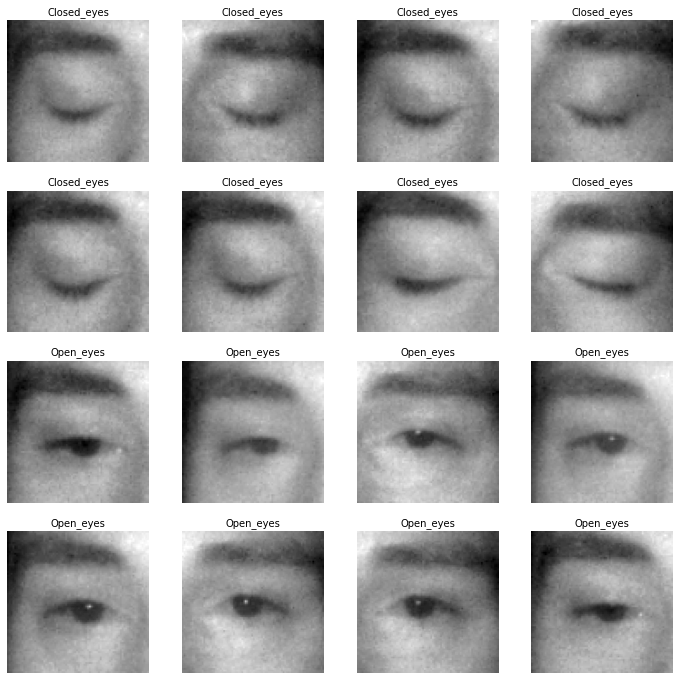

In [48]:
rows=4
col=4

fig=plt.gcf()
fig.set_size_inches(12,12)

Closed_eyes_pic = [os.path.join(train_closed_dir,filename) for filename in train_closed_names[:8]]
Open_eyes_pic = [os.path.join(train_open_dir,filename) for filename in train_open_names[:8]]

print(Closed_eyes_pic)
print(Open_eyes_pic)

merged_list = Closed_eyes_pic + Open_eyes_pic

for i,img_path in enumerate(merged_list):
    img_path_name=img_path.replace('\\','/')
    data=img_path_name.split('/',7)[6]
    sp=plt.subplot(rows,col,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')

In [49]:
dgen_train = ImageDataGenerator(rescale=1./255,validation_split=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=0.2,
                               shear_range=0.2,width_shift_range=0.2,height_shift_range=0.2)

dgen_validation = ImageDataGenerator(rescale=1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,target_size=(80,80),batch_size=8,subset='training',
                                                 class_mode='categorical')

validation_generator = dgen_train.flow_from_directory(train_dir,target_size=(80,80),batch_size=8,subset='validation',
                                                 class_mode='categorical')

test_generator = dgen_test.flow_from_directory(test_dir,target_size=(80,80),batch_size=8,
                                                 class_mode='categorical')

Found 61128 images belonging to 2 classes.
Found 15281 images belonging to 2 classes.
Found 8489 images belonging to 2 classes.


In [50]:
bmodel= InceptionV3(include_top=False,weights='imagenet',input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [51]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_282 (Conv2D)            (None, 39, 39, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 39, 39, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_282 (Activation)    (None, 39, 39, 32)   0           ['batch_normalization_282[0

In [57]:
checkpoint=ModelCheckpoint(r"C:\Users\Asus\Downloads\prepared_data\Models\model.h5",monitor='val_loss',verbose=3,
                           save_best_only=True)
earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(train_generator,steps_per_epoch=train_generator.samples//8,
                   validation_data=validation_generator,
                   validation_steps=validation_generator.samples//8,
                   callbacks=callbacks,
                    epochs=20)

Epoch 1/20
7641/7641 [==============================] - 192s 25ms/step - loss: 0.1819 - accuracy: 0.9294 - val_loss: 0.2493 - val_accuracy: 0.8948

Epoch 00001: val_loss improved from inf to 0.24927, saving model to C:\Users\Asus\Downloads\prepared_data\Models\model.h5
Epoch 2/20
7641/7641 [==============================] - 198s 26ms/step - loss: 0.1735 - accuracy: 0.9328 - val_loss: 0.2593 - val_accuracy: 0.8967

Epoch 00002: val_loss did not improve from 0.24927
Epoch 3/20
7641/7641 [==============================] - 203s 27ms/step - loss: 0.1686 - accuracy: 0.9355 - val_loss: 0.2597 - val_accuracy: 0.9054

Epoch 00003: val_loss did not improve from 0.24927
Epoch 4/20
7641/7641 [==============================] - 204s 27ms/step - loss: 0.1662 - accuracy: 0.9362 - val_loss: 0.2411 - val_accuracy: 0.9101

Epoch 00004: val_loss improved from 0.24927 to 0.24113, saving model to C:\Users\Asus\Downloads\prepared_data\Models\model.h5
Epoch 5/20
7641/7641 [==============================] - 20

In [60]:
acc_tr, loss_tr = model.evaluate_generator(train_generator)
print(acc_tr)
print(loss_tr)

C:\Users\Asus\anaconda3\envs\tensorflow2.6\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.14055007696151733
0.9450006484985352


In [61]:
acc_vr, loss_vr = model.evaluate_generator(validation_generator)
print(acc_vr)
print(loss_vr)

0.2208394855260849
0.907663106918335


In [62]:
acc_test, loss_test = model.evaluate_generator(test_generator)
print(acc_tr)
print(loss_tr)

0.14055007696151733
0.9450006484985352
